# Handwriting recognition

## Data import and visualization

Import the MNIST train dataset ([https://en.wikipedia.org/wiki/MNIST_database](https://en.wikipedia.org/wiki/MNIST_database))

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# This dataset is contained in the sample data directory of Google Colab online runtimes
data = np.genfromtxt('mnist_train_small.csv', delimiter=',')
data.shape

(20000, 785)

Store the data in a matrix and the labels in a vector

In [3]:
labels_full = data[:,0]
A_full = data[:,1:].transpose()
labels_full.shape, A_full.shape

((20000,), (784, 20000))

Visualize the first 30 pictures with the corresponding labels

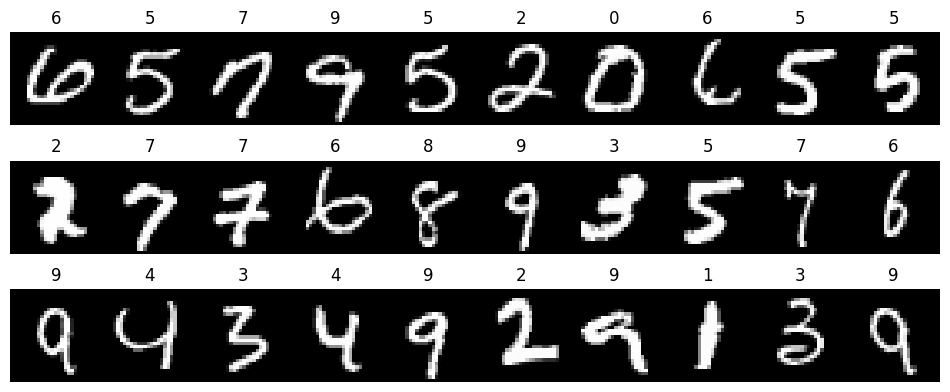

In [32]:
figures, axes = plt.subplots(3, 10, figsize=(12, 5))

for i, ax in enumerate(axes.flat):
    ax.margins(y=0.05)
    ax.imshow(A_full[:,i].reshape(28, 28), cmap='gray')
    ax.set_axis_off()
    ax.set_title(int(labels_full[i]))

plt.subplots_adjust(wspace=0, hspace=0)

Visualize the first 30 pictures corresponding the the digit "9"

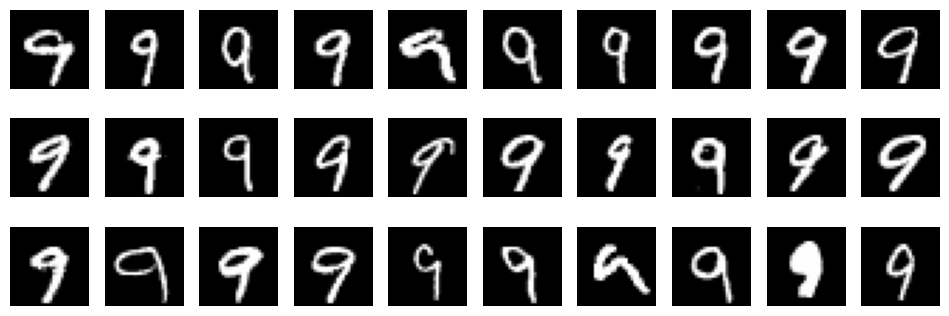

In [30]:
figures, axes = plt.subplots(3, 10, figsize=(12, 4))

i_for_9 = np.where(labels_full == 9)[0][:30]
for i, ax in enumerate(axes.flat):
    ax.imshow(A_full[:,i_for_9[i]].reshape(28, 28), cmap='gray')
    ax.set_axis_off()

### Classification of two digits (0 and 9)

We now focus on the digits 0 and 9 only. Build a reduced training dataset containing only images corresponding to these digits.

In [52]:
train_dataset = A_full[:,((labels_full == 0) | (labels_full == 9))]
labels = labels_full[((labels_full == 0) | (labels_full == 9))]
train_dataset.shape, labels.shape

((784, 3985), (3985,))

Plot the first 30 training images. 

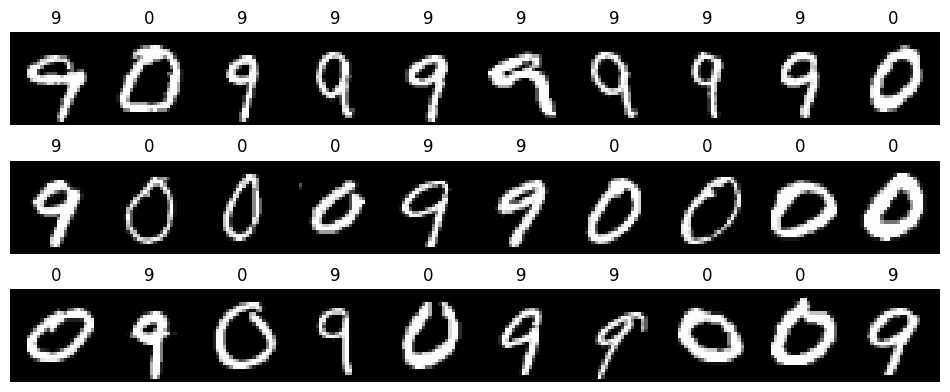

In [49]:
figures, axes = plt.subplots(3, 10, figsize=(12, 5))

for i, ax in enumerate(axes.flat):
    ax.margins(y=0.05)
    ax.imshow(train_dataset[:,i].reshape(28, 28), cmap='gray')
    ax.set_axis_off()
    ax.set_title(int(labels[i]))

plt.subplots_adjust(wspace=0, hspace=0)

Compute and visualize the average of the training data

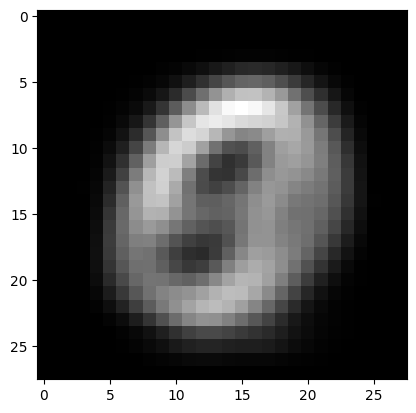

In [50]:
average = np.mean(train_dataset, axis=1)
plt.imshow(average.reshape(28, 28), cmap='gray')

Perform PCA on the data. Then, plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

Text(0.5, 1.0, 'Fraction of explained variance')

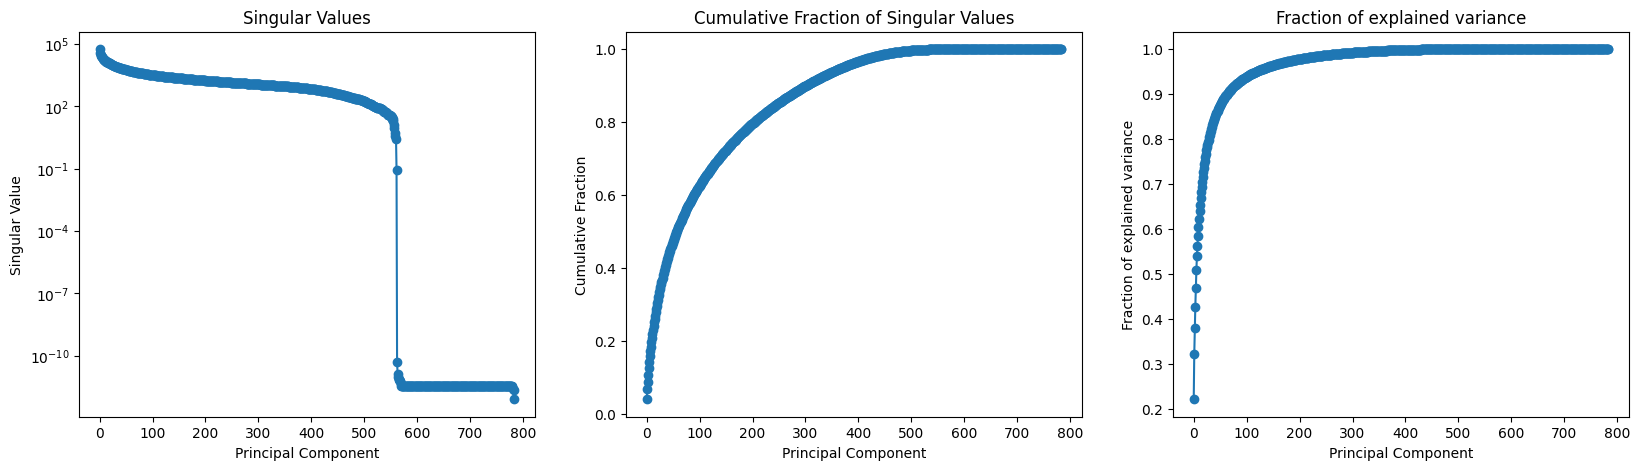

In [51]:
train_mean = np.mean(train_dataset, axis=1)
U, s, VT = np.linalg.svd(train_dataset - train_mean[:, None], full_matrices=False)

figure, axes = plt.subplots(1, 3, figsize=(20, 5))

axes[0].plot(s, '-o')
axes[0].set_yscale('log')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Singular Value')
axes[0].set_title('Singular Values')

axes[1].plot(np.cumsum(s) / np.sum(s), '-o')
axes[1].set_xlabel('Principal Component')
axes[1].set_ylabel('Cumulative Fraction')
axes[1].set_title('Cumulative Fraction of Singular Values')


axes[2].plot(np.cumsum(s ** 2) / np.sum(s ** 2), '-o')
axes[2].set_xlabel('Principal Component')
axes[2].set_ylabel('Fraction of explained variance')
axes[2].set_title('Fraction of explained variance')

Visualize the first 30 principal axes

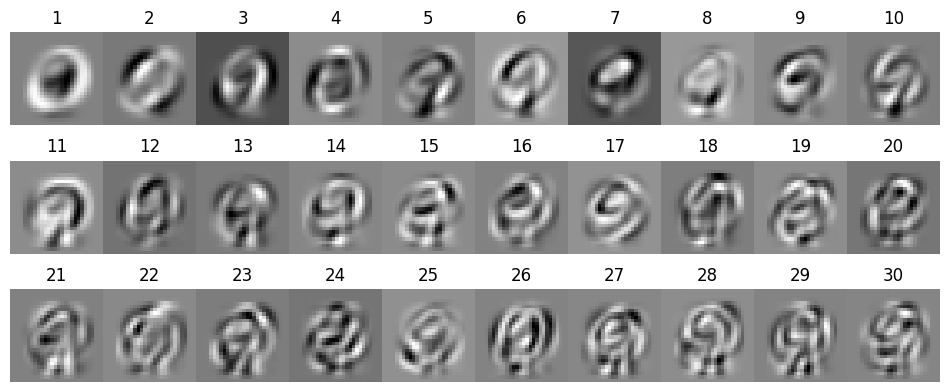

In [61]:
figures, axes = plt.subplots(3, 10, figsize=(12, 5))

for i, ax in enumerate(axes.flat):
    ax.margins(y=0.05)
    ax.imshow(U[:, i].reshape(28, 28), cmap='gray')
    ax.set_axis_off()
    ax.set_title(i + 1)

plt.subplots_adjust(wspace=0, hspace=0)

Compute the first two principal components corresponding to the first image

In [73]:
component1img1 = np.dot(U[:,0], train_dataset[:,0] - train_mean)
component2img1 = np.dot(U[:,1], train_dataset[:,0] - train_mean)
component1img1, component2img1

(-529.0964148086607, -580.8608501624383)

Define a matrix corresponding all the principal components of all the images, and check the result of the previous point

In [76]:
principal_components = U.T @ (train_dataset - train_mean[:, None])
(principal_components[0,0], principal_components[1,0])

(-529.0964148086608, -580.8608501624382)

Create a scatterplot for the first 2 principal components of all the training images, grouped by label. Consider only the first 500 pictures.

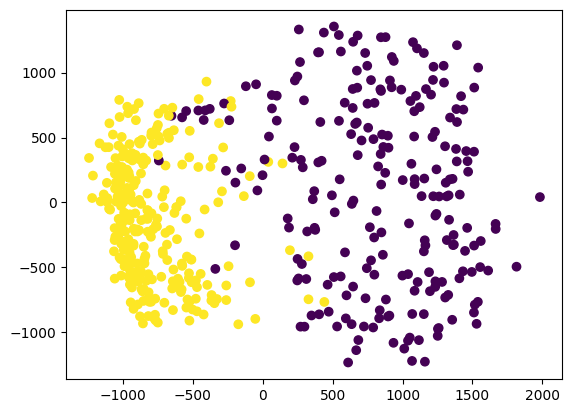

In [75]:
plt.scatter(principal_components[0,:500], principal_components[1,:500], c=labels[:500])
plt.show()

Define a classifier, by fixing a threshold on the first principal component. Then, test the classifier on the MNIST test dataset. Compute the number of true/false positive/negative for both the digits (confusion matrix) and the accuracy of the classifier.

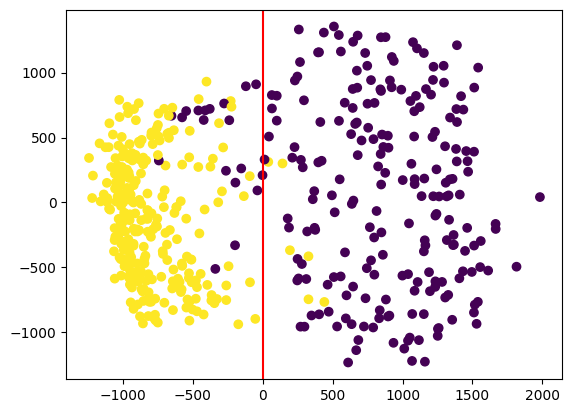

In [77]:
threshold = 0

plt.scatter(principal_components[0,:500], principal_components[1,:500], c=labels[:500])
plt.axvline(x=threshold, color='r')
plt.show()

In [80]:
test_data = np.genfromtxt('mnist_test.csv', delimiter=',')

labels_full_test = test_data[:,0]
A_full_test = test_data[:,1:].transpose()
labels_test = labels_full_test[((labels_full_test == 0) | (labels_full_test == 9))]
test_dataset = A_full_test[:,((labels_full_test == 0) | (labels_full_test == 9))]
test_dataset.shape, labels_test.shape

((784, 1989), (1989,))

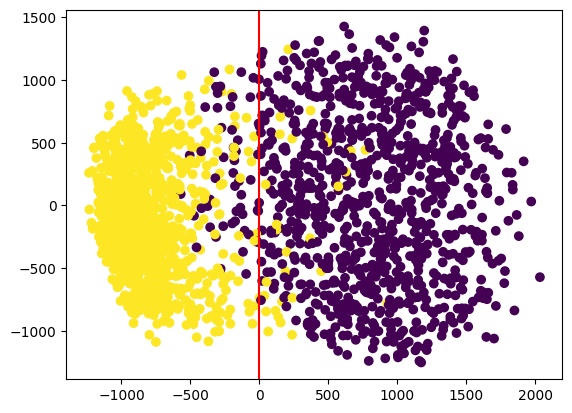

In [86]:
pca_test = U.T @ (test_dataset - train_mean[:, None])
plt.scatter(pca_test[0,:], pca_test[1,:], c=labels_test)
plt.axvline(x=threshold, color='r')
plt.show()

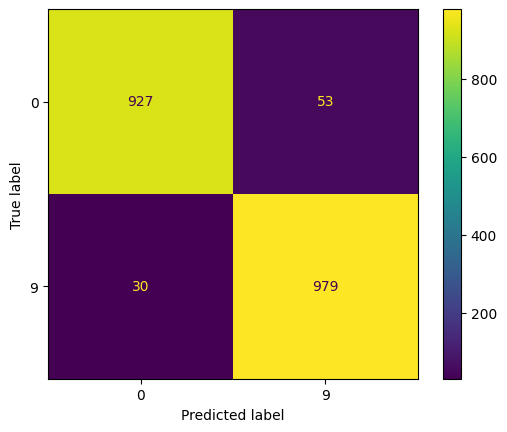

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
positive_class = 9

true_arr = (labels_test == positive_class)
pred_arr = (pca_test[0,:] <= threshold)

cm = confusion_matrix(true_arr, pred_arr, labels=[False, True])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['0', '9'])
disp.plot()
plt.show()



In [101]:
accuracy = np.sum(true_arr == pred_arr) / len(true_arr)
print(f'The model has {accuracy*100:.2f}% accuracy.')

The model has 95.83% accuracy.
